In [1]:
%matplotlib inline
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 300

#plt.rcParams['figure.autolayout'] = True
#plt.rcParams['figure.figsize'] = 2, 1.5
#plt.rcParams['axes.labelsize'] = 18
#plt.rcParams['axes.titlesize'] = 20
#plt.rcParams['font.size'] = 16
#plt.rcParams['lines.linewidth'] = 2.0
#plt.rcParams['lines.markersize'] = 8
#plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

def figsize(scale):
    fig_width_pt = 345.                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

import seaborn as sns
sns.set(style='ticks', palette='Set2')


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#points = np.array([(1, 1), (-1, 1), (1, -1), (-1, -1)])

def func(x):
    return 3*x*x*x - 2*x*x + 1*x - 1

#x = np.linspace(0, 5, 10)
x = np.array([0.47884037, 0.57703148, 0.68889946])
y = func(x)

xlots = np.array([ 0.42563308,  0.70584855,  0.38491811,  0.50279098,  0.34592126,  0.6790645,
  0.27597604,  0.53036491,  0.25474617,  0.61185453])
#xlots = np.random.random_sample(10)*(0.75-0.25)+0.25
ylots = func(xlots)

In [3]:
# fit the data with a 4th degree polynomial
z4 = np.polyfit(x, y, 3)
p4 = np.poly1d(z4)

z20 = np.polyfit(x, y, 20)
p20 = np.poly1d(z20)

z4lots = np.polyfit(xlots, ylots, 3)
p4lots = np.poly1d(z4lots)

z20lots = np.polyfit(xlots, ylots, 20)
p20lots = np.poly1d(z20lots)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RankWarning: Polyfit may be poorly conditioned
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RankWarning: Polyfit may be poorly conditioned
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RankWarning: Polyfit may be poorly conditioned


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


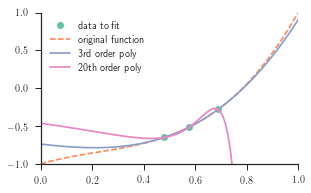

In [4]:
xx = np.linspace(0, 1, 100)
fig, ax = newfig(0.9)

plt.plot(x, y, 'o', label='data to fit')
plt.plot(xx, func(xx), '--', label='original function')
plt.plot(xx, p4(xx), label='3rd order poly')
plt.plot(xx, p20(xx), label='20th order poly')
plt.legend()
ax.axis([0,1,-1,1])
fig.show()
plt.tight_layout(.5)
sns.despine()
plt.savefig('polyfit.pgf')

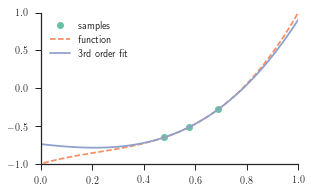

In [5]:
xx = np.linspace(-1, 1, 100)
fig, ax = newfig(0.9)

plt.plot(x, y, 'o', label='samples')
plt.plot(xx, func(xx), '--', label='function')
plt.plot(xx, p4(xx), label='3rd order fit')
plt.legend()
ax.axis([0,1,-1,1])
fig.show()
sns.despine()
plt.tight_layout(.5)
plt.savefig('polyfit3rd.pgf')

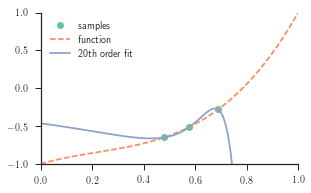

In [6]:
xx = np.linspace(0, 1, 100)
fig, ax = newfig(0.9)

plt.plot(x, y, 'o', label='samples')
plt.plot(xx, func(xx), '--', label='function')
plt.plot(xx, p20(xx), label='20th order fit')
plt.legend()
ax.axis([0,1,-1,1])
fig.show()
sns.despine()
plt.tight_layout(.5)
plt.savefig('polyfit20th.pgf')

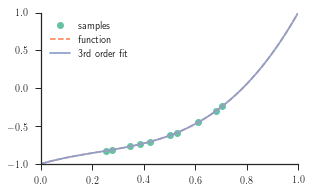

In [7]:
xx = np.linspace(0, 1, 100)
fig, ax = newfig(0.9)

plt.plot(xlots, ylots, 'o', label='samples')
plt.plot(xx, func(xx), '--', label='function')
plt.plot(xx, p4lots(xx), label='3rd order fit')
plt.legend()
ax.axis([0,1,-1,1])
fig.show()
sns.despine()
plt.tight_layout(.5)
plt.savefig('polyfit3rdlots.pgf')

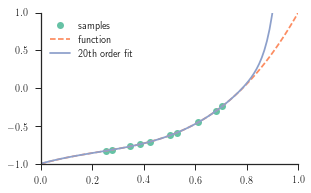

In [8]:
xx = np.linspace(0, 1, 100)
fig, ax = newfig(0.9)

plt.plot(xlots, ylots, 'o', label='samples')
plt.plot(xx, func(xx), '--', label='function')
plt.plot(xx, p20lots(xx), label='20th order fit')
plt.legend()
ax.axis([0,1,-1,1])
fig.show()
sns.despine()
plt.tight_layout(.5)
plt.savefig('polyfit20thlots.pgf')